## 1. Introduction

In this part of the project, we will clusterize data obtained from the previous notebook. The `set_option` is defined to show all columns and all the importations are made before the start.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('max_columns', None)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing

In [2]:
df = pd.read_csv('questionario_limpo.csv')
df.columns

Index(['Carimbo de data/hora', 'Idade', 'Sexo', 'Cor ou raça/etnia',
       'Área de formação (graduação)', 'Estado de origem',
       'Relação com o RCGI', 'Você conhece a Agenda 2030 da ONU e os ODS?',
       'Como você avalia seu grau de conhecimento sobre a Agenda 2030 e os ODS?',
       'Essa avaliação se refere a qual projeto do RCGI? ',
       'Erradicação da pobreza', 'Fome zero', 'Saude e bem estar',
       'Educacao de qualidade', 'Igualdade de genero',
       'Agua potavel e saneamento', 'Energia limpa e acessivel',
       'Trabalho decente e crescimento economico',
       'Industria, inovacao e infraestrutura', 'Reducao da desigualdade',
       'Cidades e comunidades sustentaveis', 'Consumo e producao responsaveis',
       'Acao contra mudanca global do clima', 'Vida na agua', 'Vida terrestre',
       'Paz, justilca e instituicoes eficazes',
       'Parcerias e meios de implementacao',
       'Quais atitudes poderiam fazer seu projeto relevante em mais ODS? (opcional)',
   

In [3]:
df = df.drop(['Carimbo de data/hora','Unnamed: 29','Quais atitudes poderiam fazer seu projeto relevante em mais ODS? (opcional)'],axis=1)
df.head()

,Idade,Sexo,Cor ou raça/etnia,Área de formação (graduação),Estado de origem,Relação com o RCGI,Você conhece a Agenda 2030 da ONU e os ODS?,Como você avalia seu grau de conhecimento sobre a Agenda 2030 e os ODS?,Essa avaliação se refere a qual projeto do RCGI?,Erradicação da pobreza,Fome zero,Saude e bem estar,Educacao de qualidade,Igualdade de genero,Agua potavel e saneamento,Energia limpa e acessivel,Trabalho decente e crescimento economico,"Industria, inovacao e infraestrutura",Reducao da desigualdade,Cidades e comunidades sustentaveis,Consumo e producao responsaveis,Acao contra mudanca global do clima,Vida na agua,Vida terrestre,"Paz, justilca e instituicoes eficazes",Parcerias e meios de implementacao,Você participa de outro projeto do RCGI?
0,25 - 29,Feminino,Branca,Engenharia,Distrito Federal (DF),Pós-doutorando,Sim,3.0,Projeto 17,2,1,5,3,3,1,1,1,4,1,4,1,5,4,1,1,1,sim
1,35 - 39,Masculino,Branca,Engenharia,Rio Grande do Sul (RS),Aluno de mestrado,Não,NaN,Projeto 1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,sim
2,45 - 49,Feminino,Branca,Química,Rio Grande do Sul (RS),Coordenador de projeto,Sim,4.0,Projeto 30,3,2,4,5,2,1,3,4,5,1,3,2,5,1,1,1,4,sim
3,50 - 54,Masculino,Branca,Engenharia,São Paulo (SP),Coordenador de projeto,Não,NaN,Projeto 6,2,3,3,4,5,2,5,5,5,3,5,5,5,5,4,1,3,sim
4,30 - 34,Feminino,Preta,Química,São Paulo (SP),Aluno de doutorado,Não,NaN,Projeto 17,1,3,5,1,1,1,5,1,5,1,5,5,5,1,5,1,5,sim


In [4]:
df["Cor ou raça/etnia"].value_counts()

Branca                  209
Parda                    28
Prefiro não declarar     21
Amarela                  14
Preta                     4
Morena                    2
latino                    1
Indígena                  1
Latino                    1
Homo sapiens sapiens      1
Name: Cor ou raça/etnia, dtype: int64

In [5]:
df["Estado de origem"].value_counts()

São Paulo (SP)              184
Estrangeiro                  21
Minas Gerais (MG)            19
Rio de Janeiro (RJ)          11
Rio Grande do Sul (RS)        7
Santa Catarina (SC)           7
Paraná (PR)                   5
Distrito Federal (DF)         5
Bahia (BA)                    5
Espírito Santo (ES)           4
Rio Grande do Norte (RN)      3
Paraíba (PB)                  2
Pará (PA)                     2
Pernambuco (PE)               2
Sergipe (SE)                  1
Alagoas (AL)                  1
Mato Grosso do Sul (MS)       1
Mato Grosso (MT)              1
Ceará (CE)                    1
Name: Estado de origem, dtype: int64

In [6]:
df["Relação com o RCGI"].value_counts()

Aluno de doutorado                            59
Pós-doutorando                                57
Professor - Pesquisador                       41
Aluno de mestrado                             36
Pesquisador                                   34
Coordenador de projeto                        28
Aluno de iniciação científica                 10
Pesquisador Sênior                             3
Técnico de laboratório                         3
Coordenador de programa                        3
Misto: administrativo & aluno de doutorado     2
vice-coordenador de programa                   1
Colaborador                                    1
Aluno de graduação                             1
Consultor                                      1
Diretor Científico                             1
Analista de Suporte de TI                      1
Name: Relação com o RCGI, dtype: int64

In [7]:
#dummies = pd.get_dummies(df["Relação com o RCGI"])
df2 = pd.get_dummies(df, columns=['Idade','Cor ou raça/etnia','Estado de origem',
                                             'Você conhece a Agenda 2030 da ONU e os ODS?',
                                             'Essa avaliação se refere a qual projeto do RCGI? ',
                                             'Você participa de outro projeto do RCGI?',
                                             'Relação com o RCGI', 'Área de formação (graduação)',
                                             'Sexo'])
#df = pd.get_dummies(df["Idade"])''
#df = pd.get_dummies(df["Cor ou raça/etnia"])
#df = pd.get_dummies(df["Estado de origem"])
#df = pd.get_dummies(df["Área de formação (graduação)"])

In [8]:
df2 = df2.fillna(0)
df2.shape

(282, 150)

In [9]:
df2.head()

,Como você avalia seu grau de conhecimento sobre a Agenda 2030 e os ODS?,Erradicação da pobreza,Fome zero,Saude e bem estar,Educacao de qualidade,Igualdade de genero,Agua potavel e saneamento,Energia limpa e acessivel,Trabalho decente e crescimento economico,"Industria, inovacao e infraestrutura",Reducao da desigualdade,Cidades e comunidades sustentaveis,Consumo e producao responsaveis,Acao contra mudanca global do clima,Vida na agua,Vida terrestre,"Paz, justilca e instituicoes eficazes",Parcerias e meios de implementacao,Idade_18 - 24,Idade_25 - 29,Idade_30 - 34,Idade_35 - 39,Idade_40 - 44,Idade_45 - 49,Idade_50 - 54,Idade_55 - 59,Idade_60 - 64,Idade_65+,Cor ou raça/etnia_Amarela,Cor ou raça/etnia_Branca,Cor ou raça/etnia_Homo sapiens sapiens,Cor ou raça/etnia_Indígena,Cor ou raça/etnia_Latino,Cor ou raça/etnia_Morena,Cor ou raça/etnia_Parda,Cor ou raça/etnia_Prefiro não declarar,Cor ou raça/etnia_Preta,Cor ou raça/etnia_latino,Estado de origem_Alagoas (AL),Estado de origem_Bahia (BA),Estado de origem_Ceará (CE),Estado de origem_Distrito Federal (DF),Estado de origem_Espírito Santo (ES),Estado de origem_Estrangeiro,Estado de origem_Mato Grosso (MT),Estado de origem_Mato Grosso do Sul (MS),Estado de origem_Minas Gerais (MG),Estado de origem_Paraná (PR),Estado de origem_Paraíba (PB),Estado de origem_Pará (PA),Estado de origem_Pernambuco (PE),Estado de origem_Rio Grande do Norte (RN),Estado de origem_Rio Grande do Sul (RS),Estado de origem_Rio de Janeiro (RJ),Estado de origem_Santa Catarina (SC),Estado de origem_Sergipe (SE),Estado de origem_São Paulo (SP),Você conhece a Agenda 2030 da ONU e os ODS?_Não,Você conhece a Agenda 2030 da ONU e os ODS?_Sim,Essa avaliação se refere a qual projeto do RCGI? _Projeto 1,Essa avaliação se refere a qual projeto do RCGI? _Projeto 10,Essa avaliação se refere a qual projeto do RCGI? _Projeto 11,Essa avaliação se refere a qual projeto do RCGI? _Projeto 12,Essa avaliação se refere a qual projeto do RCGI? _Projeto 13,Essa avaliação se refere a qual projeto do RCGI? _Projeto 14,Essa avaliação se refere a qual projeto do RCGI? _Projeto 15,Essa avaliação se refere a qual projeto do RCGI? _Projeto 16,Essa avaliação se refere a qual projeto do RCGI? _Projeto 17,Essa avaliação se refere a qual projeto do RCGI? _Projeto 18,Essa avaliação se refere a qual projeto do RCGI? _Projeto 19,Essa avaliação se refere a qual projeto do RCGI? _Projeto 2,Essa avaliação se refere a qual projeto do RCGI? _Projeto 20,Essa avaliação se refere a qual projeto do RCGI? _Projeto 21,Essa avaliação se refere a qual projeto do RCGI? _Projeto 22,Essa avaliação se refere a qual projeto do RCGI? _Projeto 23,Essa avaliação se refere a qual projeto do RCGI? _Projeto 24,Essa avaliação se refere a qual projeto do RCGI? _Projeto 25,Essa avaliação se refere a qual projeto do RCGI? _Projeto 26,Essa avaliação se refere a qual projeto do RCGI? _Projeto 27,Essa avaliação se refere a qual projeto do RCGI? _Projeto 28,Essa avaliação se refere a qual projeto do RCGI? _Projeto 29,Essa avaliação se refere a qual projeto do RCGI? _Projeto 3,Essa avaliação se refere a qual projeto do RCGI? _Projeto 30,Essa avaliação se refere a qual projeto do RCGI? _Projeto 31,Essa avaliação se refere a qual projeto do RCGI? _Projeto 32,Essa avaliação se refere a qual projeto do RCGI? _Projeto 33,Essa avaliação se refere a qual projeto do RCGI? _Projeto 34,Essa avaliação se refere a qual projeto do RCGI? _Projeto 35,Essa avaliação se refere a qual projeto do RCGI? _Projeto 36,Essa avaliação se refere a qual projeto do RCGI? _Projeto 37,Essa avaliação se refere a qual projeto do RCGI? _Projeto 38,Essa avaliação se refere a qual projeto do RCGI? _Projeto 39,Essa avaliação se refere a qual projeto do RCGI? _Projeto 4,Essa avaliação se refere a qual projeto do RCGI? _Projeto 40,Essa avaliação se refere a qual projeto do RCGI? _Projeto 41,Essa avaliação se refere a qual projeto do RCGI? _Projeto 42,Essa avaliação se refere a qual projeto do RCGI? _Projeto 43,Essa aval

In [10]:
import hdbscan

In [11]:
def plot_big(clustering_name, reducer_name, model, df_comp, dims=2, countries=30):
    df_comp2 = df_comp.copy()
    fig,ax = plt.subplots(figsize=(16,12))

    m = model.fit(df_comp2)  # first 3 cols, or dims
    df_comp2.insert(0, 'cluster', m.labels_)
    
    datas = []
    for i in range(len(set(m.labels_))):
        tup = []
        for j in range(dims):
            tup.append(df_comp2[df_comp2['cluster']==i][j])
        datas.append(tup)

    groups = [clustering_name+str(i) for i in range(len(set(m.labels_)))]
    colors = ('green','red','yellow','cyan','purple','brown','black','blue','magenta')

    for data,color,group in zip(datas,colors,groups):
        x,y = data[0],data[1]
        
        ax.scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=500, label=group)
        ax.set_title(f'{reducer_name} {clustering_name} {len(set(m.labels_))} clusters')
        ax.set(xlabel=f'{reducer_name}1')
        ax.set(ylabel=f'{reducer_name}2')

    #for index,row in df_comp2[df_comp2.index.isin(['United Kingdom','Belgium','Canada', 'France', 'Germany', 'Italy', 'Netherlands', 'Sweden', 'Switzerland','Canada','Japan','United States','China','Australia','Singapore','South Africa','Belarus','Brazil','Russia','India','Poland'])].iterrows():
        #ax.annotate(index, (row[0],row[1]))
    #for index,row in df_comp2.sample(countries).iterrows():
        #ax.annotate(index, (row[0],row[1]))

    plt.legend(loc=1)
    plt.show()

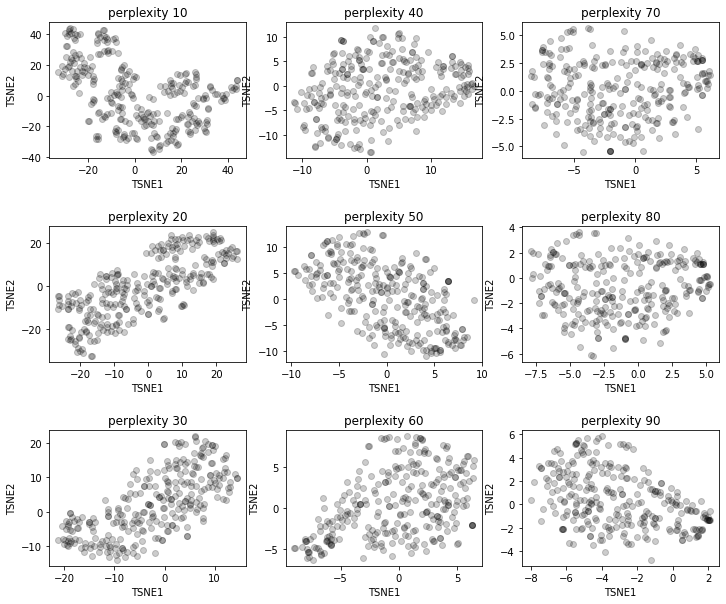

In [12]:
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

plotX = df2.copy()
ps = [10,20,30,40,50,60,70,80,90]

fig,ax = plt.subplots(3, 3, figsize=(12,10))
plt.subplots_adjust(hspace=.5)
import math 

# the search for ideal perplexity hyperameters...
for i, perplexity in enumerate(ps):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsneComponents = tsne.fit_transform(plotX)
    TSNE_components = pd.DataFrame(tsneComponents, index=plotX.index)

    ax[i%3][math.floor(i/3)].set_title(f'perplexity {perplexity}')
    ax[i%3][math.floor(i/3)].scatter(TSNE_components[0], TSNE_components[1], alpha=.2, color='black')
    ax[i%3][math.floor(i/3)].set(xlabel = 'TSNE1')
    ax[i%3][math.floor(i/3)].set(ylabel = 'TSNE2')

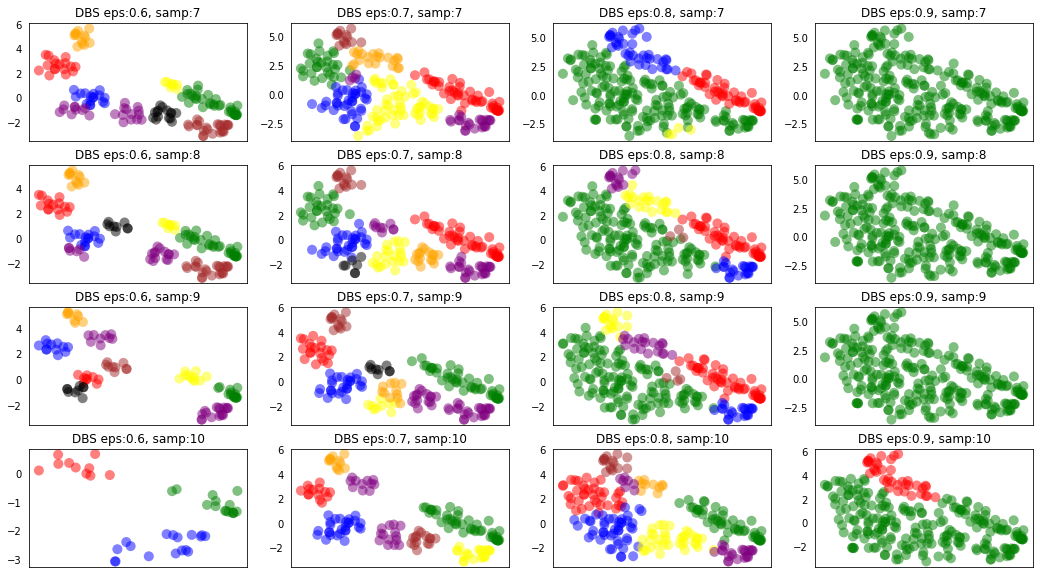

In [32]:

import numpy as np
from itertools import product
from math import floor  

samp_list = [7,8,9,10]
eps_list = [0.6,0.7,0.8,0.9]
rows = len(samp_list)

fig, ax = plt.subplots(len(samp_list), len(eps_list), figsize=(18,10))

for k, (eps, samp) in enumerate(product(eps_list, samp_list)):
    ax[k%rows][floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False) 

    TSNE_df = TSNE_components.copy()
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(TSNE_df)
    TSNE_df.insert(0, 'cluster', clustering.labels_)

    datas = [[TSNE_df[TSNE_df['cluster']==i][j] for j in range(2)] for i in range(len(set(clustering.labels_)))]
    colors = ('green','red','blue','yellow','purple','brown','orange','purple','black')
    groups = [str(i) for i in range(len(set(clustering.labels_)))]

    for data,color,group in zip(datas,colors,groups):
        ax[k%rows][floor(k/rows)].scatter(data[0],data[1], alpha=0.5, c=color, edgecolors='none', s=100, label=group)
        ax[k%rows][floor(k/rows)].set_title(f'DBS eps:{eps}, samp:{samp}')

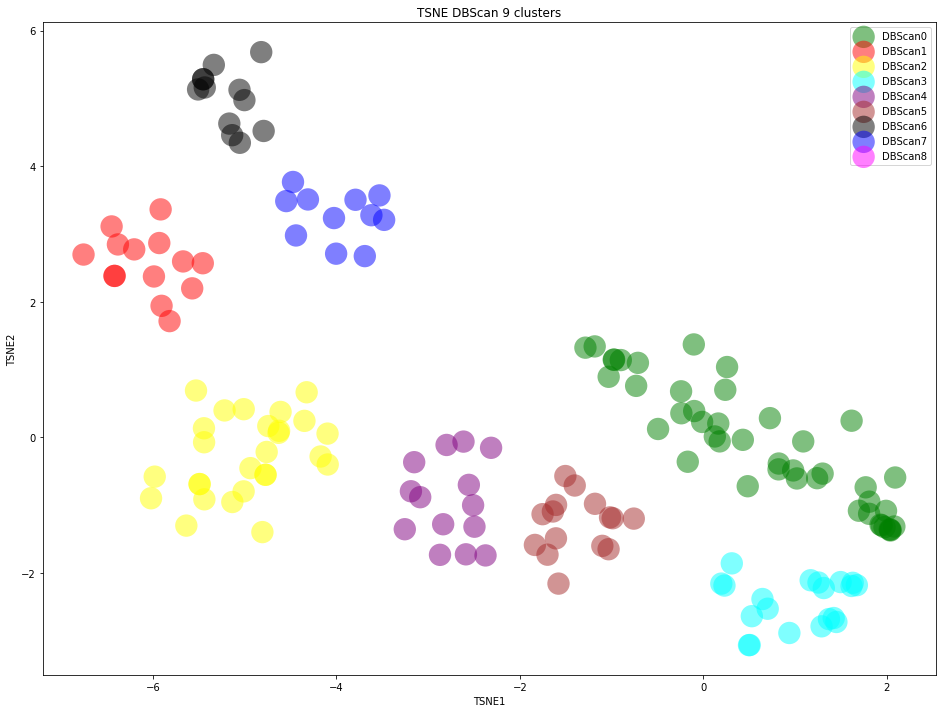

In [50]:
TSNE_df = TSNE_components.copy()
clustering = DBSCAN(eps=0.7, min_samples=10).fit(TSNE_df)
plot_big('DBScan','TSNE',clustering, TSNE_df, countries=282)

In [51]:
df2['clusters'] = clustering.labels_
df['clusters'] = clustering.labels_

In [52]:
df = df.fillna(0)
df2.head()

,Como você avalia seu grau de conhecimento sobre a Agenda 2030 e os ODS?,Erradicação da pobreza,Fome zero,Saude e bem estar,Educacao de qualidade,Igualdade de genero,Agua potavel e saneamento,Energia limpa e acessivel,Trabalho decente e crescimento economico,"Industria, inovacao e infraestrutura",Reducao da desigualdade,Cidades e comunidades sustentaveis,Consumo e producao responsaveis,Acao contra mudanca global do clima,Vida na agua,Vida terrestre,"Paz, justilca e instituicoes eficazes",Parcerias e meios de implementacao,Idade_18 - 24,Idade_25 - 29,Idade_30 - 34,Idade_35 - 39,Idade_40 - 44,Idade_45 - 49,Idade_50 - 54,Idade_55 - 59,Idade_60 - 64,Idade_65+,Cor ou raça/etnia_Amarela,Cor ou raça/etnia_Branca,Cor ou raça/etnia_Homo sapiens sapiens,Cor ou raça/etnia_Indígena,Cor ou raça/etnia_Latino,Cor ou raça/etnia_Morena,Cor ou raça/etnia_Parda,Cor ou raça/etnia_Prefiro não declarar,Cor ou raça/etnia_Preta,Cor ou raça/etnia_latino,Estado de origem_Alagoas (AL),Estado de origem_Bahia (BA),Estado de origem_Ceará (CE),Estado de origem_Distrito Federal (DF),Estado de origem_Espírito Santo (ES),Estado de origem_Estrangeiro,Estado de origem_Mato Grosso (MT),Estado de origem_Mato Grosso do Sul (MS),Estado de origem_Minas Gerais (MG),Estado de origem_Paraná (PR),Estado de origem_Paraíba (PB),Estado de origem_Pará (PA),Estado de origem_Pernambuco (PE),Estado de origem_Rio Grande do Norte (RN),Estado de origem_Rio Grande do Sul (RS),Estado de origem_Rio de Janeiro (RJ),Estado de origem_Santa Catarina (SC),Estado de origem_Sergipe (SE),Estado de origem_São Paulo (SP),Você conhece a Agenda 2030 da ONU e os ODS?_Não,Você conhece a Agenda 2030 da ONU e os ODS?_Sim,Essa avaliação se refere a qual projeto do RCGI? _Projeto 1,Essa avaliação se refere a qual projeto do RCGI? _Projeto 10,Essa avaliação se refere a qual projeto do RCGI? _Projeto 11,Essa avaliação se refere a qual projeto do RCGI? _Projeto 12,Essa avaliação se refere a qual projeto do RCGI? _Projeto 13,Essa avaliação se refere a qual projeto do RCGI? _Projeto 14,Essa avaliação se refere a qual projeto do RCGI? _Projeto 15,Essa avaliação se refere a qual projeto do RCGI? _Projeto 16,Essa avaliação se refere a qual projeto do RCGI? _Projeto 17,Essa avaliação se refere a qual projeto do RCGI? _Projeto 18,Essa avaliação se refere a qual projeto do RCGI? _Projeto 19,Essa avaliação se refere a qual projeto do RCGI? _Projeto 2,Essa avaliação se refere a qual projeto do RCGI? _Projeto 20,Essa avaliação se refere a qual projeto do RCGI? _Projeto 21,Essa avaliação se refere a qual projeto do RCGI? _Projeto 22,Essa avaliação se refere a qual projeto do RCGI? _Projeto 23,Essa avaliação se refere a qual projeto do RCGI? _Projeto 24,Essa avaliação se refere a qual projeto do RCGI? _Projeto 25,Essa avaliação se refere a qual projeto do RCGI? _Projeto 26,Essa avaliação se refere a qual projeto do RCGI? _Projeto 27,Essa avaliação se refere a qual projeto do RCGI? _Projeto 28,Essa avaliação se refere a qual projeto do RCGI? _Projeto 29,Essa avaliação se refere a qual projeto do RCGI? _Projeto 3,Essa avaliação se refere a qual projeto do RCGI? _Projeto 30,Essa avaliação se refere a qual projeto do RCGI? _Projeto 31,Essa avaliação se refere a qual projeto do RCGI? _Projeto 32,Essa avaliação se refere a qual projeto do RCGI? _Projeto 33,Essa avaliação se refere a qual projeto do RCGI? _Projeto 34,Essa avaliação se refere a qual projeto do RCGI? _Projeto 35,Essa avaliação se refere a qual projeto do RCGI? _Projeto 36,Essa avaliação se refere a qual projeto do RCGI? _Projeto 37,Essa avaliação se refere a qual projeto do RCGI? _Projeto 38,Essa avaliação se refere a qual projeto do RCGI? _Projeto 39,Essa avaliação se refere a qual projeto do RCGI? _Projeto 4,Essa avaliação se refere a qual projeto do RCGI? _Projeto 40,Essa avaliação se refere a qual projeto do RCGI? _Projeto 41,Essa avaliação se refere a qual projeto do RCGI? _Projeto 42,Essa avaliação se refere a qual projeto do RCGI? _Projeto 43,Essa aval

In [53]:
#labels =clustering.labels_
#df['clusters'] = labels
agregado = df2.groupby(["clusters"]).mean()
agregado = agregado.style.background_gradient(cmap ='summer').set_properties(**{'font-size': '12px'}) 
agregado

In [54]:
agregado2 = df.groupby(["clusters"]).mean()
agregado2 = agregado2.style.background_gradient(cmap ='summer').set_properties(**{'font-size': '12px'}) 
agregado2

import dataframe_image as dfi
dfi.export(agregado2,"mytable.png",fontsize=14, max_rows=None, max_cols=-1)

In [55]:
agregado2

,Como você avalia seu grau de conhecimento sobre a Agenda 2030 e os ODS?,Erradicação da pobreza,Fome zero,Saude e bem estar,Educacao de qualidade,Igualdade de genero,Agua potavel e saneamento,Energia limpa e acessivel,Trabalho decente e crescimento economico,"Industria, inovacao e infraestrutura",Reducao da desigualdade,Cidades e comunidades sustentaveis,Consumo e producao responsaveis,Acao contra mudanca global do clima,Vida na agua,Vida terrestre,"Paz, justilca e instituicoes eficazes",Parcerias e meios de implementacao
clusters,,,,,,,,,,,,,,,,,,
-1,2.408000,1.792000,1.544000,3.864000,3.128000,2.192000,1.864000,4.312000,3.152000,4.192000,1.872000,3.496000,3.648000,4.504000,2.440000,2.944000,1.752000,3.760000
0,0.000000,3.295455,3.590909,4.590909,4.068182,3.340909,3.931818,4.977273,4.545455,4.909091,3.590909,4.522727,4.590909,4.863636,4.318182,4.522727,3.295455,4.500000
1,3.428571,1.000000,1.214286,2.500000,1.214286,1.071429,1.142857,4.428571,1.785714,4.285714,1.071429,2.928571,3.500000,4.928571,2.642857,1.857143,1.000000,2.071429
2,3.629630,2.037037,1.592593,3.814815,3.037037,1.407407,1.481481,4.555556,4.222222,4.629630,1.629630,3.777778,3.740741,4.814815,1.555556,2.555556,1.814815,3.666667
3,4.050000,4.350000,4.100000,4.550000,4.700000,4.200000,4.700000,4.900000,4.850000,4.550000,4.650000,4.900000,4.800000,4.800000,4.750000,4.950000,4.350000,4.700000
4,3.214286,2.714286,2.714286,3.500000,3.142857,2.857143,2.571429,4.785714,4.000000,4.785714,2.928571,4.142857,4.285714,4.642857,2.928571,3.571429,2.071429,3.928571
5,3.266667,2.000000,1.933333,4.000000,3.866667,2.666667,3.266667,4.600000,4.400000,4.866667,2.600000,3.933333,4.600000,4.933333,3.933333,4.466667,4.066667,4.600000
6,0.000000,1.000000,1.000000,2.666667,1.500000,1.250000,1.000000,2.500000,1.500000,2.083333,1.000000,1.416667,1.666667,3.250000,1.333333,1.666667,1.000000,1.666667
7,0.000000,1.090909,1.181818,3.000000,1.727273,1.272727,1.272727,4.545455,3.363636,4.000000,1.181818,3.545455,4.000000,4.727273,1.636364,2.818182,1.090909,2.272727


In [30]:
df3 = df2[df2['clusters'] == 7]
df3.head()

,Como você avalia seu grau de conhecimento sobre a Agenda 2030 e os ODS?,Erradicação da pobreza,Fome zero,Saude e bem estar,Educacao de qualidade,Igualdade de genero,Agua potavel e saneamento,Energia limpa e acessivel,Trabalho decente e crescimento economico,"Industria, inovacao e infraestrutura",Reducao da desigualdade,Cidades e comunidades sustentaveis,Consumo e producao responsaveis,Acao contra mudanca global do clima,Vida na agua,Vida terrestre,"Paz, justilca e instituicoes eficazes",Parcerias e meios de implementacao,Idade_18 - 24,Idade_25 - 29,Idade_30 - 34,Idade_35 - 39,Idade_40 - 44,Idade_45 - 49,Idade_50 - 54,Idade_55 - 59,Idade_60 - 64,Idade_65+,Cor ou raça/etnia_Amarela,Cor ou raça/etnia_Branca,Cor ou raça/etnia_Homo sapiens sapiens,Cor ou raça/etnia_Indígena,Cor ou raça/etnia_Latino,Cor ou raça/etnia_Morena,Cor ou raça/etnia_Parda,Cor ou raça/etnia_Prefiro não declarar,Cor ou raça/etnia_Preta,Cor ou raça/etnia_latino,Estado de origem_Alagoas (AL),Estado de origem_Bahia (BA),Estado de origem_Ceará (CE),Estado de origem_Distrito Federal (DF),Estado de origem_Espírito Santo (ES),Estado de origem_Estrangeiro,Estado de origem_Mato Grosso (MT),Estado de origem_Mato Grosso do Sul (MS),Estado de origem_Minas Gerais (MG),Estado de origem_Paraná (PR),Estado de origem_Paraíba (PB),Estado de origem_Pará (PA),Estado de origem_Pernambuco (PE),Estado de origem_Rio Grande do Norte (RN),Estado de origem_Rio Grande do Sul (RS),Estado de origem_Rio de Janeiro (RJ),Estado de origem_Santa Catarina (SC),Estado de origem_Sergipe (SE),Estado de origem_São Paulo (SP),Você conhece a Agenda 2030 da ONU e os ODS?_Não,Você conhece a Agenda 2030 da ONU e os ODS?_Sim,Essa avaliação se refere a qual projeto do RCGI? _Projeto 1,Essa avaliação se refere a qual projeto do RCGI? _Projeto 10,Essa avaliação se refere a qual projeto do RCGI? _Projeto 11,Essa avaliação se refere a qual projeto do RCGI? _Projeto 12,Essa avaliação se refere a qual projeto do RCGI? _Projeto 13,Essa avaliação se refere a qual projeto do RCGI? _Projeto 14,Essa avaliação se refere a qual projeto do RCGI? _Projeto 15,Essa avaliação se refere a qual projeto do RCGI? _Projeto 16,Essa avaliação se refere a qual projeto do RCGI? _Projeto 17,Essa avaliação se refere a qual projeto do RCGI? _Projeto 18,Essa avaliação se refere a qual projeto do RCGI? _Projeto 19,Essa avaliação se refere a qual projeto do RCGI? _Projeto 2,Essa avaliação se refere a qual projeto do RCGI? _Projeto 20,Essa avaliação se refere a qual projeto do RCGI? _Projeto 21,Essa avaliação se refere a qual projeto do RCGI? _Projeto 22,Essa avaliação se refere a qual projeto do RCGI? _Projeto 23,Essa avaliação se refere a qual projeto do RCGI? _Projeto 24,Essa avaliação se refere a qual projeto do RCGI? _Projeto 25,Essa avaliação se refere a qual projeto do RCGI? _Projeto 26,Essa avaliação se refere a qual projeto do RCGI? _Projeto 27,Essa avaliação se refere a qual projeto do RCGI? _Projeto 28,Essa avaliação se refere a qual projeto do RCGI? _Projeto 29,Essa avaliação se refere a qual projeto do RCGI? _Projeto 3,Essa avaliação se refere a qual projeto do RCGI? _Projeto 30,Essa avaliação se refere a qual projeto do RCGI? _Projeto 31,Essa avaliação se refere a qual projeto do RCGI? _Projeto 32,Essa avaliação se refere a qual projeto do RCGI? _Projeto 33,Essa avaliação se refere a qual projeto do RCGI? _Projeto 34,Essa avaliação se refere a qual projeto do RCGI? _Projeto 35,Essa avaliação se refere a qual projeto do RCGI? _Projeto 36,Essa avaliação se refere a qual projeto do RCGI? _Projeto 37,Essa avaliação se refere a qual projeto do RCGI? _Projeto 38,Essa avaliação se refere a qual projeto do RCGI? _Projeto 39,Essa avaliação se refere a qual projeto do RCGI? _Projeto 4,Essa avaliação se refere a qual projeto do RCGI? _Projeto 40,Essa avaliação se refere a qual projeto do RCGI? _Projeto 41,Essa avaliação se refere a qual projeto do RCGI? _Projeto 42,Essa avaliação se refere a qual projeto do RCGI? _Projeto 43,Essa aval